# Assignments for Day 2

#### 0. Use `input()`:

a. ask the user for a number, then print the factorial of that number (Use math.factorial or np.math.factorial)

b. use input() in a while loop, so that each time the user inputs something, we write it out to a file. When the user inputs the word "Done", stop the loop and close the file.

In [4]:
import numpy as np
import math
x=input('enter a number:')
print('the factorial of', x, 'is:', math.factorial(int(x)))

enter a number: 4


the factorial of 4 is: 24


In [15]:
# when opening a file, mode 'w' will delete the previous 
# contents and create a brand-new file.
# use 'a' for 'append' instead
file = open('user_output.txt','a')
userinput=''
while userinput != 'Done':
    userinput=input("enter your input:")
    file.write(userinput+"\n")
file.close()

enter your input: now we can append
enter your input: Done


#### 1. Download and read in a csv file of recent earthquakes

Go to https://earthquake.usgs.gov/earthquakes/search/ and conduct a search of your choice that returns approximately 100 to 200 earthquakes.

Under 'output options' change the format to 'CSV', it should download directly to your computer.

a. Now, read this file into python using Pandas, and print out just the 'time', 'latitude', 'longitude', and 'mag' columns.

b. Also, make a simple plot with 'longitude' on the X axis and 'latitude' on the Y axis, using plt.scatter(). Optionally, try coloring the points or setting their size based on magnitude.

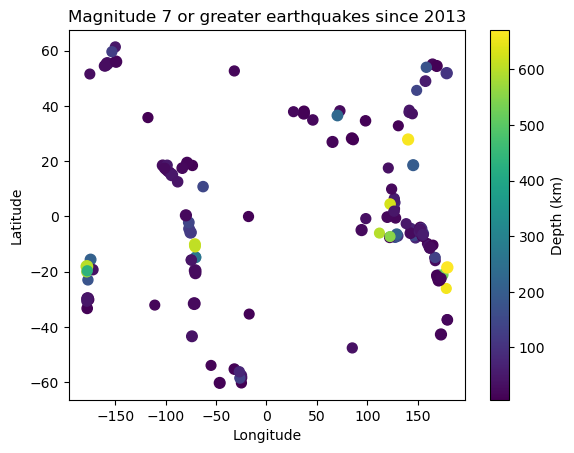

In [14]:
import pandas as pd

import matplotlib.pyplot as plt

eqs = pd.read_csv('query.csv')


plt.scatter(eqs['longitude'],eqs['latitude'],s=eqs['mag']**2,c=eqs['depth'])
cbar = plt.colorbar()
cbar.set_label('Depth (km)')
plt.title('Magnitude 7 or greater earthquakes since 2013')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


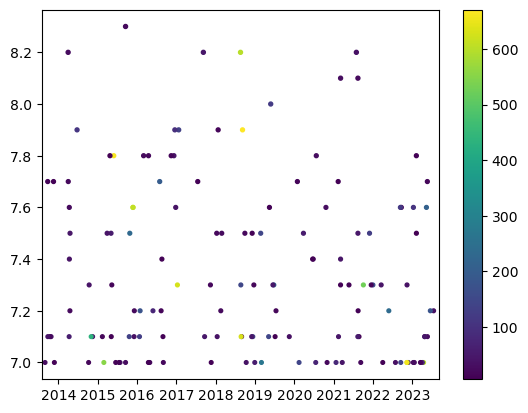

In [41]:
# an extra example: reading the date strings 
# and converting them to datetime objects, 
# so that we can plot earthquakes vs. time
import datetime

# define the datetime format that is used by USGS 
# (I got this by giving ChatGPT an example datestring)
date_format = "%Y-%m-%dT%H:%M:%S.%fZ"

# Convert each string to a datetime object and store in a list
datetime_objects = []
for date_string in eqs['time']:
    datetime_object = datetime.datetime.strptime(date_string, date_format)
    datetime_objects.append(datetime_object)
    
# now do the scatter plot again but with the x axis as the datetime values
plt.scatter(datetime_objects,eqs['mag'],eqs['mag'],eqs['depth'])
plt.colorbar()

# our x axis limits also need to be datetime objects:
# default inputs of datetime.datetime are: (year,month,day)
starttime = datetime.datetime(2013,8,1)
endtime   = datetime.datetime(2023,9,1)
plt.xlim([starttime,endtime])

# finally, show the plot
plt.show()

#### 2. cats

Make a plot of the cats vs. time csv file. It is a simple plot, but make sure it looks nice! Add axis labels, use a nice color scheme, add a legend, etc.


,year,faculty1,faculty2
0,1.0,2.0,1.0
1,2.0,3.0,1.0
2,3.0,3.0,1.0
3,4.0,3.0,1.0
4,5.0,4.0,2.0
5,6.0,10.0,2.0
6,7.0,11.0,15.0
7,8.0,12.0,38.0
8,9.0,18.0,42.0
9,10.0,20.0,48.0


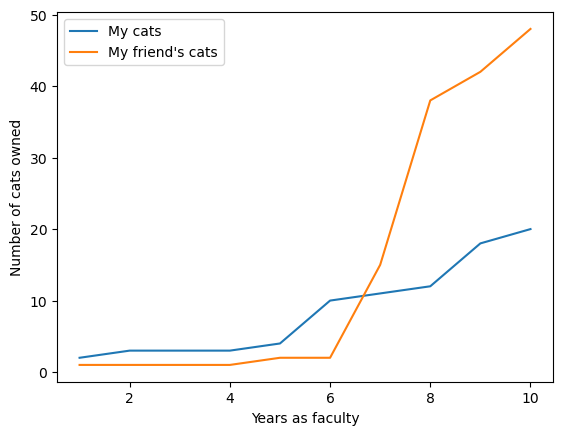

In [23]:
# cats
cats = pd.read_csv('cats_over_time.csv')
display(cats)

plt.plot(cats['year'],cats['faculty1'], label='My cats')
plt.plot(cats['year'],cats['faculty2'], label='My friend\'s cats')
plt.legend()

plt.xlabel('Years as faculty')
plt.ylabel('Number of cats owned')
plt.show()

#### 3. SST plots
Download the full timeseries of sea surface temperatures from 1891 to present ('sst.mon.mean.nc', 157 MB) from https://downloads.psl.noaa.gov/Datasets/COBE/.

a. create a beautiful plot of the most recent month's SST, and use plt.savefig() to save it as a PDF (no need to turn in the pdf, just make it for yourself).\
Extra points for using creative colorschemes, plotting methods, or anything else unexpected!

b. Create a time-series plot of the SST of one point in the ocean over the whole time period. Is it going up?


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: COBE Sea Surface Temperature Analysis
    history: created June 2011 at ESRL/PSD using the grib data from JRA.
    platform: Analyses
    original_source: http://near-goos1.jodc.go.jp/cgi-bin/1997/near_goos_catalog?projectname=NEAR-GOOS
    Conventions: CF-1.2
    institution: NOAA ESRL/PSD
    comment: recent values (w/i last year) may change as dataset is updated. It is a monitoring dataset.
    dataset_title: COBE Sea Surface Temperature
    References: https://www.psl.noaa.gov/data/gridded/data.cobe.html
    dimensions(sizes): lon(360), lat(180), time(1590)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 sst(time, lat, lon)
    groups: 


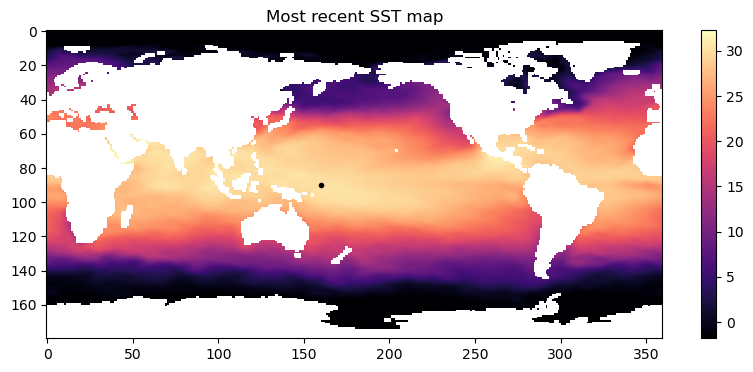

In [36]:
# copied this code from the example file, and just changed the filename
import netCDF4 as nc
filename = 'sst.mon.mean.nc'
dataset = nc.Dataset(filename)

# print some information about the dataset:
print(dataset)
# in the last line, we can read that the array 'sst' is stored as a float32 array, with indices in the order (time,lat,lon).
# there is lots of other data in this file too!

# get the grid in the most recent month (index -1) and plot it.
sst_latest=dataset['sst'][-1,:,:]
plt.figure(figsize=(10,4))
plt.imshow(sst_latest,cmap=plt.cm.magma)
plt.plot(160,90,'k.')
plt.colorbar()
plt.title('Most recent SST map')
plt.show()

In [30]:
# what are the units of time? Looks like they are in days since 1891
print(dataset['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1891-1-1 00:00:00
    long_name: Time
    delta_t: 0000-01-00 00:00:00
    avg_period: 0000-01-00 00:00:00
    prev_avg_period: 0000-00-01 00:00:00
    axis: T
    standard_name: time
    coordinate_defines: start
    actual_range: [    0. 48363.]
unlimited dimensions: time
current shape = (1590,)
filling on, default _FillValue of 9.969209968386869e+36 used


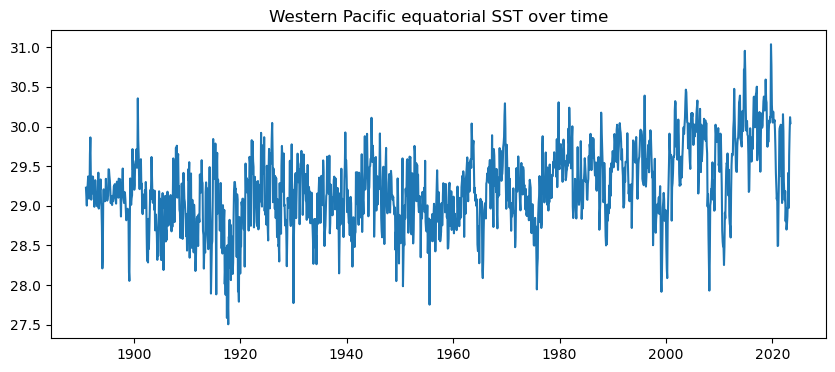

In [39]:
# extract a timeseries at 1 point on the earth
# first index is time, we want all values (:)
# second index is latitude, with 0 at north pole and 180 at south pole
# third index is longitude, increasing eastwards from 0 to 360
# see the matching black dot on the map above.
sst_timeseries=dataset['sst'][:,90,160]

# lazy way to convert days since 1891 to years:
time=np.array(dataset['time'])/365.25 +1891

# plot the timeseries
plt.figure(figsize=(10,4))
plt.plot(time,sst_timeseries)

plt.title('Western Pacific equatorial SST over time')
plt.show()

In [29]:
# list all available colormaps
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight